In [1]:
import pandas as pd
import requests; from urllib.parse import urlparse
import seaborn as sns; sns.set(style='darkgrid', font='NanumGothic', font_scale=1.2)
import matplotlib.pyplot as plt
import squarify

import numpy as np
import datetime

import urllib.request
import json


In [12]:
df = pd.read_csv('C:/project/CODE/keyword/data/naver_top_500/blog/2022-06-06_three_years_keyword_query.csv', encoding='UTF-8', index_col=0)
df['기간']= pd.to_datetime(df['기간'])
df

,기간,운동화,원피스,반팔티,써스데이아일랜드원피스,반바지,롱원피스,블라우스,여름원피스,셔츠,...,폴로반팔셔츠,리바이스쿨진여성,엉뽕,비비안컴포트브라팬티,트임밴딩롱스커트,질염예방여성면팬티,마리나요팅티셔츠,바스락스커트,비뮤즈맨션,김나영실리콘니플패치니플패드
0,2019-06-07,15.19479,63.14255,10.30252,6.83477,7.99669,16.701991,15.540087,14.216304,4.118790,...,0.942466,-0.000010,0.478420,-0.000010,-0.00001,-0.000010,-0.000010,0.050348,0.194239,-0.000010
1,2019-06-08,15.10485,61.76840,10.52555,7.79524,8.48231,16.727193,16.831494,14.550853,3.870577,...,1.104346,-0.000010,0.302156,-0.000010,-0.00001,-0.000010,-0.000010,0.053948,0.143877,-0.000010
2,2019-06-09,16.41785,82.70441,12.32418,8.19094,10.65146,18.968285,19.849601,15.993346,4.643974,...,1.374139,-0.000010,0.417270,-0.000010,-0.00001,-0.000010,-0.000010,0.089918,0.154669,-0.000010
3,2019-06-10,15.47897,69.31184,10.58671,6.93909,8.04345,19.788468,18.299189,15.399793,4.852637,...,1.262621,-0.000010,0.280575,-0.000010,-0.00001,-0.000010,-0.000010,0.129488,0.176254,-0.000010
4,2019-06-11,15.90344,68.31900,10.07949,6.72686,7.97150,20.903586,20.043855,15.698409,4.831054,...,1.223056,-0.000010,0.327337,-0.000010,-0.00001,-0.000010,-0.000010,0.082726,0.118695,-0.000010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2022-06-02,19.61221,72.40548,11.88531,14.18756,12.24504,14.259472,13.622751,23.961305,4.874221,...,2.611593,0.089918,0.287767,0.046752,-0.00001,0.025167,1.438890,1.107942,4.064882,-0.000010
1092,2022-06-03,18.39634,71.72919,11.27378,14.07244,11.20543,13.270238,12.450055,24.299409,4.608042,...,2.259060,0.129488,0.208628,0.021571,-0.00001,0.028767,0.575549,0.942466,5.662061,0.028767
1093,2022-06-04,19.58703,76.56030,12.21986,16.23439,13.18392,13.460873,13.205486,25.562058,4.633182,...,2.625982,0.129488,0.118695,-0.000010,-0.00001,-0.000010,0.284171,0.974844,3.287877,0.064737
1094,2022-06-05,22.95406,81.31947,12.18389,17.16968,12.36015,14.205513,13.989675,25.619636,4.636800,...,2.568427,0.118695,0.187047,-0.000010,-0.00001,-0.000010,0.115099,0.791383,2.406551,0.064737


In [13]:
df['year'] = df['기간'].dt.year
df['month'] = df['기간'].dt.month
df['date'] = df['기간'].dt.date
df = df.set_index('기간')
df

,운동화,원피스,반팔티,써스데이아일랜드원피스,반바지,롱원피스,블라우스,여름원피스,셔츠,팬츠,...,비비안컴포트브라팬티,트임밴딩롱스커트,질염예방여성면팬티,마리나요팅티셔츠,바스락스커트,비뮤즈맨션,김나영실리콘니플패치니플패드,year,month,date
기간,,,,,,,,,,,,,,,,,,,,,
2019-06-07,15.19479,63.14255,10.30252,6.83477,7.99669,16.701991,15.540087,14.216304,4.118790,0.845342,...,-0.000010,-0.00001,-0.000010,-0.000010,0.050348,0.194239,-0.000010,2019,6,2019-06-07
2019-06-08,15.10485,61.76840,10.52555,7.79524,8.48231,16.727193,16.831494,14.550853,3.870577,0.687062,...,-0.000010,-0.00001,-0.000010,-0.000010,0.053948,0.143877,-0.000010,2019,6,2019-06-08
2019-06-09,16.41785,82.70441,12.32418,8.19094,10.65146,18.968285,19.849601,15.993346,4.643974,0.776995,...,-0.000010,-0.00001,-0.000010,-0.000010,0.089918,0.154669,-0.000010,2019,6,2019-06-09
2019-06-10,15.47897,69.31184,10.58671,6.93909,8.04345,19.788468,18.299189,15.399793,4.852637,0.744621,...,-0.000010,-0.00001,-0.000010,-0.000010,0.129488,0.176254,-0.000010,2019,6,2019-06-10
2019-06-11,15.90344,68.31900,10.07949,6.72686,7.97150,20.903586,20.043855,15.698409,4.831054,0.830953,...,-0.000010,-0.00001,-0.000010,-0.000010,0.082726,0.118695,-0.000010,2019,6,2019-06-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-02,19.61221,72.40548,11.88531,14.18756,12.24504,14.259472,13.622751,23.961305,4.874221,1.046787,...,0.046752,-0.00001,0.025167,1.438890,1.107942,4.064882,-0.000010,2022,6,2022-06-02
2022-06-03,18.39634,71.72919,11.27378,14.07244,11.20543,13.270238,12.450055,24.299409,4.608042,0.906497,...,0.021571,-0.00001,0.028767,0.575549,0.942466,5.662061,0.028767,2022,6,2022-06-03
2022-06-04,19.58703,76.56030,12.21986,16.23439,13.18392,13.460873,13.205486,25.562058,4.633182,0.794979,...,-0.000010,-0.00001,-0.000010,0.284171,0.974844,3.287877,0.064737,2022,6,2022-06-04


In [14]:
# 키워드 연평균 검색량
df.groupby(df.index.year).mean()

,운동화,원피스,반팔티,써스데이아일랜드원피스,반바지,롱원피스,블라우스,여름원피스,셔츠,팬츠,...,엉뽕,비비안컴포트브라팬티,트임밴딩롱스커트,질염예방여성면팬티,마리나요팅티셔츠,바스락스커트,비뮤즈맨션,김나영실리콘니플패치니플패드,year,month
기간,,,,,,,,,,,,,,,,,,,,,
2019,20.066209,53.156462,3.963786,5.759299,4.159888,13.297642,18.155547,10.437287,4.331026,0.718400,...,0.257209,-0.000010,-0.000010,-0.000010,-0.000010,0.047721,0.335311,-0.000010,2019.0,9.091346
2020,24.374373,53.981691,5.915489,8.407175,4.958393,13.463765,14.187295,8.176775,4.274715,0.729414,...,0.235578,-0.000010,0.000049,-0.000010,-0.000010,0.078224,0.559872,-0.000010,2020.0,6.513661
2021,24.394674,48.991143,5.004038,8.548839,5.281933,10.062677,11.002726,7.422347,4.004845,0.992090,...,0.182866,0.000039,-0.000010,-0.000010,0.005992,0.168389,0.796094,-0.000010,2021.0,6.526027
2022,25.026625,47.772139,8.997661,8.138330,4.805786,9.453126,10.630368,7.325748,4.591831,0.869904,...,0.194446,0.017839,-0.000010,0.000654,0.032296,0.309856,0.896277,0.001227,2022.0,3.127389


In [15]:
# 전년대비 평균 검색량 변화율
df.groupby(df.index.year).mean().pct_change()

,운동화,원피스,반팔티,써스데이아일랜드원피스,반바지,롱원피스,블라우스,여름원피스,셔츠,팬츠,...,엉뽕,비비안컴포트브라팬티,트임밴딩롱스커트,질염예방여성면팬티,마리나요팅티셔츠,바스락스커트,비뮤즈맨션,김나영실리콘니플패치니플패드,year,month
기간,,,,,,,,,,,,,,,,,,,,,
2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020,0.214697,0.015525,0.492383,0.459757,0.191954,0.012493,-0.218570,-0.216580,-0.013002,0.015331,...,-0.084096,0.000000,-5.871847,0.000000,0.000000,0.639174,0.669711,0.000000,0.000495,-0.283532
2021,0.000833,-0.092449,-0.154079,0.016850,0.065251,-0.252610,-0.224466,-0.092265,-0.063132,0.360119,...,-0.223756,-4.906799,-1.205261,0.000000,-597.680771,1.152658,0.421923,0.000000,0.000495,0.001899
2022,0.025905,-0.024882,0.798080,-0.048019,-0.090146,-0.060575,-0.033842,-0.013015,0.146569,-0.123160,...,0.063322,453.701807,0.000000,-66.164168,4.390083,0.840118,0.125842,-123.204398,0.000495,-0.520782


In [16]:
# 키워드 연월 평균 검색량
df['year'] = df.index.year; df['month'] = df.index.month
df_ym = df.groupby([df.index.year, df.index.month]).mean()
df_ym

운동화        원피스        반팔티  써스데이아일랜드원피스        반바지       롱원피스  \
기간   기간                                                                       
2019 6   15.104855  71.087683   9.379979     7.371663   8.504348  19.212594   
     7   14.595670  75.503638   7.811485     7.101550   9.968327  18.864665   
     8   17.178496  59.707062   4.838531     6.454625   5.592909  14.332580   
     9   23.512472  47.289467   2.144436     5.317813   1.890231  12.196928   
     10  22.991192  41.802961   1.495176     4.918366   1.341538  12.240140   
     11  24.239716  38.024864   1.422948     4.916599   1.217424   9.477164   
     12  21.966555  42.051171   1.736307     4.557132   1.417312   7.936311   
2020 1   23.896073  44.155331   2.416651     5.427204   1.706485   8.970805   
     2   28.243134  46.333465   3.126751     6.235397   1.770833  10.786510   
     3   30.550409  49.405114   5.853767     7.601336   2.999174  13.703412   
     4   28.303171  54.457829   8.808945     9.277427   4.374373  16.088441   
     5   25.189808  68.036208  18.536169    11.275523  11.372415  19.475038   
     6   19.447697  84.237079  13.658160    12.979959  14.709277  22.171168   
     7   17.912683  78.536239   7.886912    13.441996   9.616145  20.113256   
     8   17.713211  70.415965   5.783564    10.327357   8.030802  14.927991   
     9   24.197988  47.191260   1.839749     9.361843   2.125011  11.369678   
     10  27.429155  39.213520   1.017553     6.388018   1.083349  10.587373   
     11  27.074590  34.610593   1.006507     4.672465   0.832998   7.766298   
     12  22.833377  30.841671   0.924488     3.843368   0.745438   5.546690   
2021 1   25.833020  32.647608   1.259496     4.257865   0.939341   5.767274   
     2   29.406115  39.156337   2.319324     5.522290   1.405106   8.555376   
     3   31.416766  50.873025   4.750571     7.884475   2.542440  13.075857   
     4   26.935856  56.614981   9.068907    10.369792   4.918159  13.721808   
     5   23.156781  60.402377  10.901988    10.483198   9.476548  13.307247   
     6   19.989204  76.799041  10.688629    13.189677  14.150263  14.568962   
     7   17.001651  77.581806   7.500496    13.292653  14.840630  11.672933   
     8   19.980175  49.369142   3.703889    10.465560   5.894382   8.237893   
     9   24.913721  44.329527   2.988592     9.199607   3.228528   9.958355   
     10  25.742856  39.898274   3.007645     7.480654   2.934771  10.252708   
     11  25.492999  31.429183   1.975486     5.395514   1.700175   6.630533   
     12  23.343953  28.266735   1.775413     4.879609   1.070236   5.006633   
2022 1   23.631502  29.538885   2.365710     4.997042   1.285026   4.991429   
     2   26.013392  32.683468   3.288654     5.639586   1.668093   6.438134   
     3   27.606117  46.078816   6.665006     7.159338   2.567156   9.148582   
     4   25.522976  57.846680  17.248577     9.645066   7.008880  12.410849   
     5   23.200876  65.909886  14.449226    11.573862   9.751564  13.201534   
     6   21.253757  77.055523  12.535817    15.803322  12.636540  13.993283   

              블라우스      여름원피스        셔츠        팬츠  ...        엉뽕  비비안컴포트브라팬티  \
기간   기간                                            ...                         
2019 6   18.488047  15.698680  4.406732  0.738324  ...  0.288217   -0.000010   
     7   53.724419  15.175616  4.252717  0.704933  ...  0.252144   -0.000010   
     8   14.113030   8.051655  5.050497  0.621616  ...  0.286724   -0.000010   
     9   15.497654   5.056371  6.661707  0.713203  ...  0.262827   -0.000010   
     10  10.620093   7.426082  4.379089  0.781520  ...  0.292990   -0.000010   
     11   7.168437  10.393623  2.840458  0.789225  ...  0.222658   -0.000010   
     12   7.112067  12.272050  2.770176  0.686599  ...  0.200970   -0.000010   
2020 1    8.749871  14.444676  3.269850  0.603746  ...  0.218260   -0.000010   
     2   14.273744   4.358954  4.354239  0.664115  ...  0.243857   -0.000010   
     3   17.516964   2.358119  5.268065  0.775138  ..

In [27]:
df_ym.columns[:100]

Index(['운동화', '원피스', '반팔티', '써스데이아일랜드원피스', '반바지', '롱원피스', '블라우스', '여름원피스',
       '셔츠', '팬츠', '지고트원피스', '지컷원피스', '여성점프수트', '남자반바지', '나이키반바지', '써스데이아일랜드',
       '바스락원피스', '린넨원피스', '잇미샤원피스', '쉬폰원피스', '하객원피스', '온앤온원피스', '뷔스티에원피스',
       '여름가디건', '케네스레이디원피스', '스포츠브라', '베네통원피스', '라코스테원피스', '모조에스핀원피스',
       '시슬리원피스', '셔츠원피스', '플라스틱아일랜드원피스', '메종키츠네반팔', '여성원피스', '쉬즈미스원피스',
       '여성반바지', '남자반팔', '에고이스트원피스', '플라스틱아일랜드', '티셔츠', '올리비아로렌', '여성블라우스',
       '랩원피스', '스투시반팔', '잇미샤', '남자7부티셔츠', '듀엘원피스', '모조에스핀', '린원피스', '로엠원피스',
       '스커트', '펀칭원피스', '점프수트', '민소매원피스', '나이키바람막이', '플리츠원피스', '샤틴원피스',
       '반팔블라우스', '데님원피스', '여성티셔츠', '여름잠옷', '베네통', '남자오버핏반팔', '브라렛', '에잇세컨즈',
       '메종키츠네', '라이프워크', '보브원피스', '폴로랄프로렌', '나이키반팔', '롱스커트', '린넨자켓', '에고이스트',
       '여름니트', '남자반팔티', '스퀘어넥원피스', '반팔자켓', '잠옷', '쥬크원피스', '쥬시쥬디', '쥬시쥬디원피스',
       '리스트원피스', '라코스테', '라코스테카라티', '타미힐피거', '반팔트위드자켓', '써스데이아일랜드블라우스',
       '여자크롭티', '여성린넨셔츠', '여름블라우스', '보니스팍스', '나이키반팔티', '미니원피스', '폴로반팔니트',
       '니트원피스', '올리브데올리브원피스

Text(0.5, 1.0, '자바나스반팔 검색량')

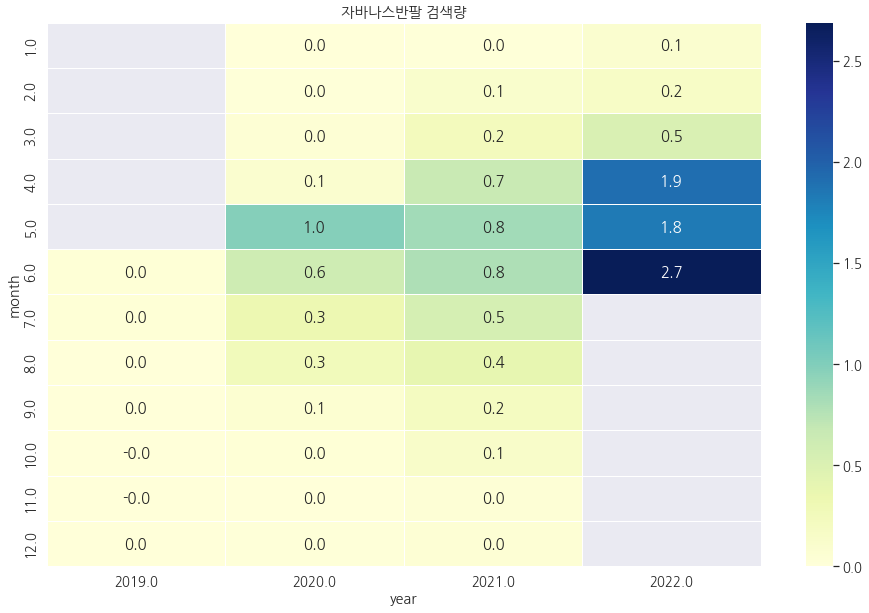

In [20]:
# 열지도 시각화
f, ax = plt.subplots(figsize=(16,10))
sns.heatmap(df_ym.pivot("month", "year", "자바나스반팔"), cmap="YlGnBu",
           annot=True, annot_kws={"size": 15}, fmt='.1f', linewidths=.5, ax=ax)
ax.set_title('자바나스반팔 검색량')

Text(0.5, 1.0, '반팔트위드자켓 검색량')

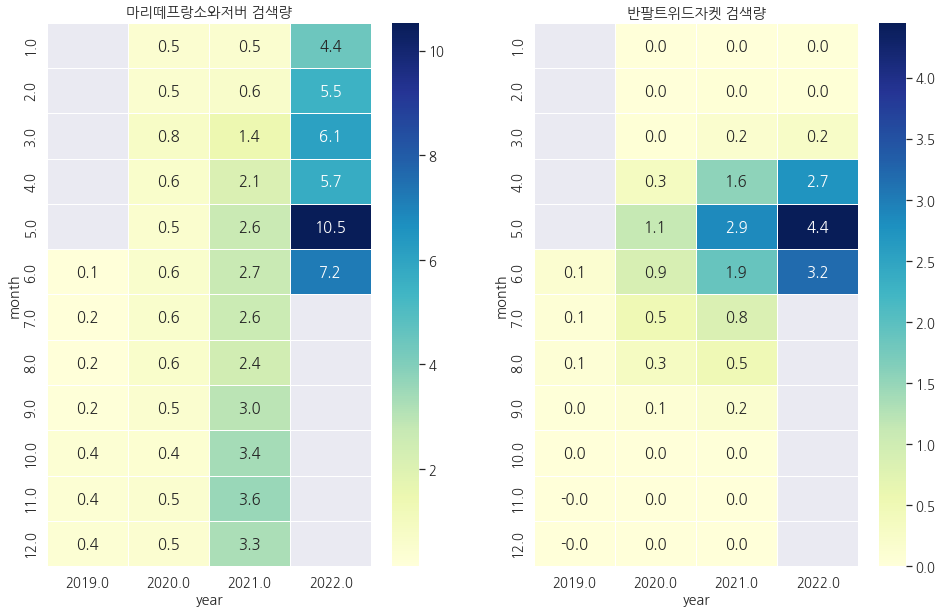

In [33]:
# '키워드1' vs '키워드2' 검색량 비교 열지도
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,10))
sns.heatmap(df_ym.pivot("month", "year", "마리떼프랑소와저버"), cmap="YlGnBu",
           annot=True, annot_kws={"size": 15}, fmt='.1f', linewidths=.5, ax=ax1)
sns.heatmap(df_ym.pivot("month", "year", "반팔트위드자켓"), cmap="YlGnBu",
           annot=True, annot_kws={"size": 15}, fmt='.1f', linewidths=.5, ax=ax2)
ax1.set_title("마리떼프랑소와저버 검색량")
ax2.set_title("반팔트위드자켓 검색량")